L'obiettivo di questo progetto è quello di effettuare un task di classificazione sul Dataset “Mammographic_masses". In particolare, il problema che ci si pone è quello di predire la gravità (benigna o maligna) di una lesione di massa mammografica dagli attributi BI-RADS e dall'età del paziente. il seguente dataset contiene una valutazione BI-RADS, l'età del paziente e tre attributi BI-RADS insieme al ground truth (assieme al campo severità) per 516 masse benigne e 445 masse maligne identificate su mammografie digitali a pieno campo. BI-RADS è l'acronimo di Breast Imaging-Reporting and Data System, uno strumento di garanzia della qualità originariamente progettato per l'uso con la mammografia. il termine "BI-RADS" si riferisce alle categorie di valutazione mammografica,sono codici numerici standardizzati in genere assegnati da un radiologo dopo aver interpretato una mammografia. Ciò consente una comprensione concisa e inequivocabile dei dati dei pazienti tra più medici e strutture mediche. Le categorie di valutazione sono state sviluppate per la mammografia e successivamente adattate per l'uso con risonanza magnetica e ultrasuoni. Informazioni sull'attributo:

Valutazione BI-RADS: da 1 a 5
Età: età del paziente in anni
Forma: forma di massa: rotonda = 1 ovale = 2 lobulare = 3 irregolare = 4
Margine: margine di massa: circoscritto = 1 microlobulato = 2 oscurato = 3 mal definito = 4 speculato = 5
Densità: densità di massa alta = 1 iso = 2 bassa = 3 contenenti grasso = 4
Gravità: benigna = 0 o maligna = 1

Per prima cosa importiamo il file in formato csv usando pandas data frame. Per poter visualizzare le prime cinque righe si utilizzerà il comando .head()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("mammographic_masses_traintest.csv")
df.head(5)

,4,27,2,1,3,0
0,5,55,4,3,3,1
1,0,69,4,5,3,1
2,5,66,4,4,3,1
3,4,77,2,3,3,0
4,5,77,3,4,3,1


Aprendo il file contenente i nostri dati, notiamo che non ci sono intestazioni per quanto riguarda le colonne e sono assenti alcuni dati, indicati con '?'. Possiamo quindi leggere nuovamente il file e specificare i nomi delle colonne (usando una lista) e il range dei data frame con i parametri names e usecols rispettivamente. Possiamo inoltre specificare i valori mancanti con na_values.

In [3]:
header = ["BI_RADS", "age", "shape", "margin", "density", "severity"]

df = pd.read_csv("mammographic_masses_traintest.csv", names = header, usecols = range(6), na_values = '?')

df.head(10)

,BI_RADS,age,shape,margin,density,severity
0,4.0,27.0,2.0,1.0,3.0,0
1,5.0,55.0,4.0,3.0,3.0,1
2,0.0,69.0,4.0,5.0,3.0,1
3,5.0,66.0,4.0,4.0,3.0,1
4,4.0,77.0,2.0,3.0,3.0,0
5,5.0,77.0,3.0,4.0,3.0,1
6,4.0,57.0,2.0,1.0,3.0,0
7,5.0,40.0,4.0,1.0,1.0,1
8,4.0,53.0,3.0,3.0,3.0,0
9,4.0,64.0,3.0,3.0,3.0,1


Contiamo il numero di righe e di colonne del data set

In [4]:
df.shape

(882, 6)

Visualizziamo il numero di valori non nulli di ciascuna colonna

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 6 columns):
BI_RADS     880 non-null float64
age         879 non-null float64
shape       856 non-null float64
margin      839 non-null float64
density     813 non-null float64
severity    882 non-null int64
dtypes: float64(5), int64(1)
memory usage: 41.4 KB


Visualizziamo ora le informazioni statistiche del nostro data frame. Come possiamo notare il valore massimo di BI_RADS risulta essere di 55 e quello minimo 0, quando in realtà il suo valore dovrebbe essere compreso tra 1 e 5 

In [6]:
df.describe()

,BI_RADS,age,shape,margin,density,severity
count,880.000000,879.000000,856.000000,839.000000,813.000000,882.000000
mean,4.365909,55.551763,2.710280,2.775924,2.921279,0.460317
std,1.841926,14.392140,1.251034,1.568588,0.362941,0.498706
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


Box plot delle features

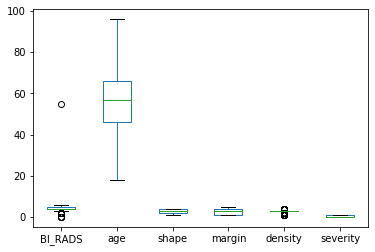

In [7]:
df.plot(kind='box')

Ordiniamo il dataset rispetto alla feature BI_RADS mettendo quindi in risalto NaN 

In [8]:
df.sort_values("BI_RADS", axis=0, ascending=False, inplace=False, na_position='last').tail(10)

,BI_RADS,age,shape,margin,density,severity
389,2.0,49.0,NaN,3.0,3.0,0
355,2.0,57.0,1.0,1.0,3.0,0
818,2.0,40.0,1.0,1.0,3.0,0
111,2.0,66.0,1.0,1.0,NaN,0
109,0.0,72.0,4.0,3.0,3.0,1
166,0.0,45.0,2.0,4.0,3.0,0
2,0.0,69.0,4.0,5.0,3.0,1
177,0.0,58.0,4.0,4.0,3.0,0
154,NaN,52.0,4.0,4.0,3.0,0
365,NaN,66.0,NaN,NaN,1.0,1


Mettiamo in risalto tutti i valori superiori a 5 o uguali a 0

In [9]:
print(df.loc[(df['BI_RADS'] > 5) | (df['BI_RADS'] == 0)])

     BI_RADS   age  shape  margin  density  severity
2        0.0  69.0    4.0     5.0      3.0         1
28      55.0  46.0    4.0     3.0      3.0         1
109      0.0  72.0    4.0     3.0      3.0         1
124      6.0  80.0    4.0     5.0      3.0         1
125      6.0  71.0    4.0     4.0      3.0         1
166      0.0  45.0    2.0     4.0      3.0         0
177      0.0  58.0    4.0     4.0      3.0         0
316      6.0  68.0    4.0     3.0      3.0         1
381      6.0  63.0    1.0     1.0      3.0         0
414      6.0  41.0    3.0     3.0      2.0         1
472      6.0  60.0    3.0     5.0      3.0         1
599      6.0  76.0    3.0     NaN      3.0         0
646      6.0  72.0    4.0     3.0      3.0         1
692      6.0  41.0    2.0     1.0      3.0         0
804      6.0  51.0    4.0     4.0      3.0         1


Valori nulli per ciascuna label

In [10]:
df.isnull().sum()

BI_RADS      2
age          3
shape       26
margin      43
density     69
severity     0
dtype: int64

Altra rappresentazione grafica

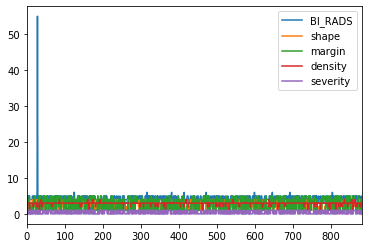

In [11]:
df.loc[:,['BI_RADS', 'shape', 'margin', 'density', 'severity']].plot()

Assegniamo qualsiasi valore superiore a 5 il valore nan

In [12]:
df.loc[df.BI_RADS > 5,'BI_RADS'] = np.nan

Come possiamo vedere dal grafico il valore massimo di BI_RADS corrisponde proprio a 5

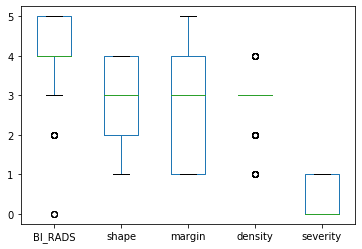

In [13]:
df.loc[:,['BI_RADS','shape','margin','density','severity']].plot(kind='box')

Rimpiazziamo i valori nulli di BI_RADS con NaN

In [14]:
df.loc[df.BI_RADS==0,'BI_RADS']=np.nan

Tutti i valori assegnati a BI_RADS sono in linea con quanto richiesto

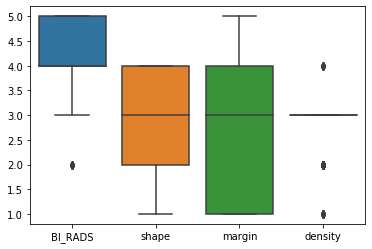

In [15]:
sb.boxplot(data=df.loc[:,['BI_RADS', 'shape', 'margin', 'density']])

I valori nulli e maggiori di 5 di BI_RADS sono stati rimpiazzati da NaN.
Questi si vanno a sommare ai due valori nulli precedentemente individuati.

In [16]:
df.isnull().sum()

BI_RADS     17
age          3
shape       26
margin      43
density     69
severity     0
dtype: int64

Guardiamo i valori NaN di BI_RADS

In [17]:
df.sort_values("BI_RADS", axis=0, ascending=True, inplace=False, na_position='first').head(20)

,BI_RADS,age,shape,margin,density,severity
2,NaN,69.0,4.0,5.0,3.0,1
28,NaN,46.0,4.0,3.0,3.0,1
109,NaN,72.0,4.0,3.0,3.0,1
124,NaN,80.0,4.0,5.0,3.0,1
125,NaN,71.0,4.0,4.0,3.0,1
154,NaN,52.0,4.0,4.0,3.0,0
166,NaN,45.0,2.0,4.0,3.0,0
177,NaN,58.0,4.0,4.0,3.0,0
316,NaN,68.0,4.0,3.0,3.0,1
365,NaN,66.0,NaN,NaN,1.0,1


Eliminiamo i valori NaN da BI_RADS

In [18]:
df.dropna(subset=['BI_RADS'], inplace=True)

Eliminare 17 istanze non inficia il risultato finale del dataframe. Ho fatto questa scelta anche in relazione al fatto che BI_RADS è un parametro critico per la rilevazione del tumore.

In [19]:
df.isnull().sum()

BI_RADS      0
age          3
shape       25
margin      41
density     69
severity     0
dtype: int64

Visualizziamo la correlazione tra i vari attributi prima di popolare i campi nulli dei vari labels

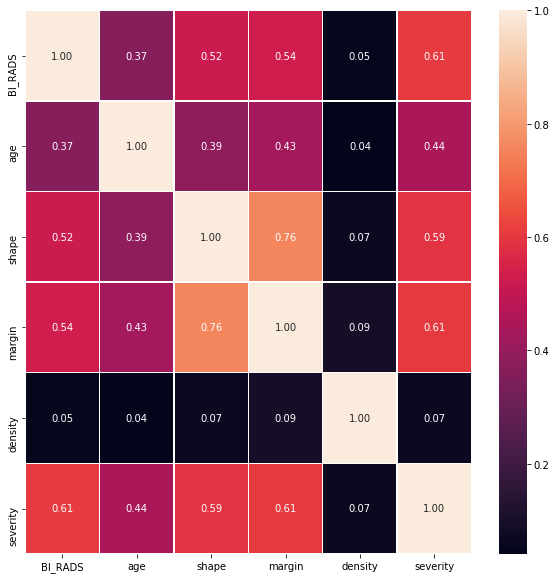

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
f,ax = plt.subplots(figsize=(10, 10))
corr=df.corr()
sns.heatmap(corr, annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.show()

Per quanto riguarda i valori nulli di age, shape, margin e density possiamo utilizzare Imputer dalla libreria sklearn.preprocessing che ci permetterà di sostituire i valori NaN con la mediana (in questo caso) dei valori presenti per ciascuna tabella. 

In [21]:
from sklearn.preprocessing import Imputer
imp_media=Imputer(missing_values='NaN', strategy='median') 
imp_media=imp_media.fit(df)
#Imputer(copy=True, missing_values='NaN', strategy='median', verbose=0)
#print (imp_media.transform(df.head(30)))
df_new=imp_media.transform(df.values)
#print(np.isnan(imp_media.transform(df)).sum())

df_new = pd.DataFrame(df_new,index=df.index,columns=df.columns)
#print(type(df_new))
#df_new.columns = df.columns
#df_new.index = df.index
df_new

,BI_RADS,age,shape,margin,density,severity
0,4.0,27.0,2.0,1.0,3.0,0.0
1,5.0,55.0,4.0,3.0,3.0,1.0
3,5.0,66.0,4.0,4.0,3.0,1.0
4,4.0,77.0,2.0,3.0,3.0,0.0
5,5.0,77.0,3.0,4.0,3.0,1.0
6,4.0,57.0,2.0,1.0,3.0,0.0
7,5.0,40.0,4.0,1.0,1.0,1.0
8,4.0,53.0,3.0,3.0,3.0,0.0
9,4.0,64.0,3.0,3.0,3.0,1.0
10,4.0,33.0,2.0,1.0,3.0,0.0


Dopo aver visualizzato il dataframe, confermiamo l'avvenuta sostituzione, sommando tutti i valori nulli. In questo caso il risultato com'è giusto che sia è 0.

In [22]:
df_new.isnull().sum()

BI_RADS     0
age         0
shape       0
margin      0
density     0
severity    0
dtype: int64

Visualizziamo la correlazione a seguito della sostituzione dei valori nulli e valori NaN nel dataframe

Valori vicini a 1 correlazione positiva; vicini a 0 no correlazione; vicini a -1 correlazione negativa

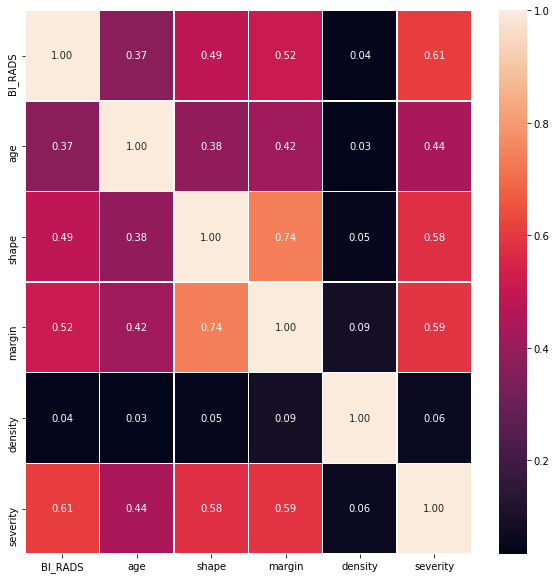

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
f,ax = plt.subplots(figsize=(10,10), )
#corr = imp_media.transform(df)
corr=df_new.corr()
sns.heatmap(corr, annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.show()

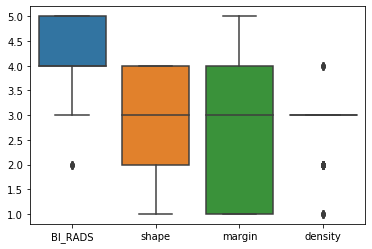

In [24]:
sb.boxplot(data=df_new.loc[:,['BI_RADS', 'shape', 'margin', 'density']])

In [25]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 865 entries, 0 to 881
Data columns (total 6 columns):
BI_RADS     865 non-null float64
age         865 non-null float64
shape       865 non-null float64
margin      865 non-null float64
density     865 non-null float64
severity    865 non-null float64
dtypes: float64(6)
memory usage: 47.3 KB


In [26]:
import matplotlib.pyplot as plt

Distribuzione dei valori delle features

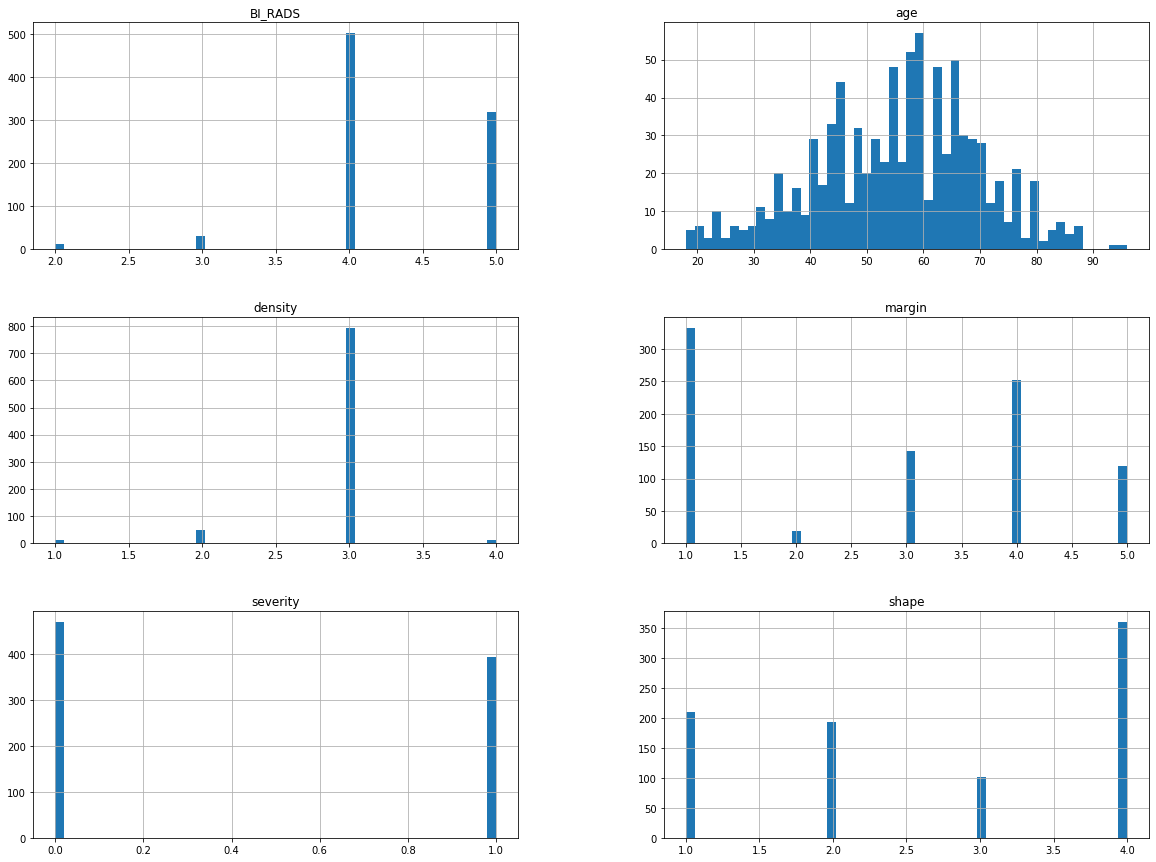

In [27]:
df_new.hist(bins=50, figsize=(20, 15))
plt.show()

Visualizzazione densità valori assunti dalle features

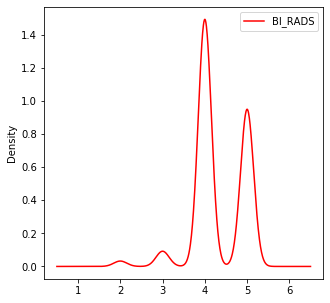

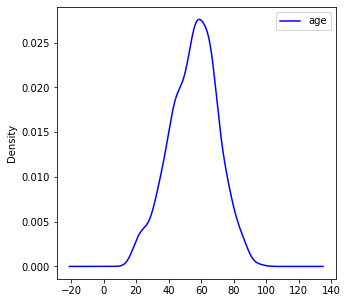

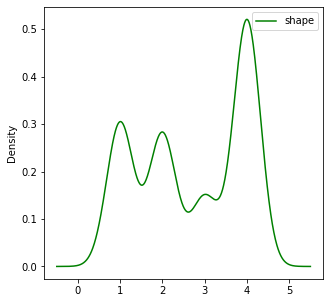

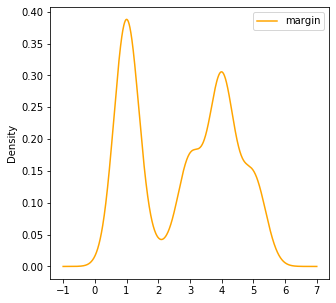

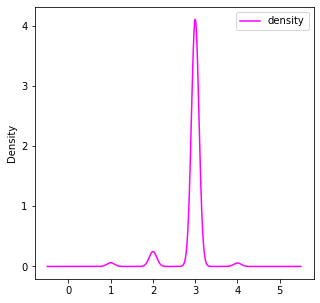

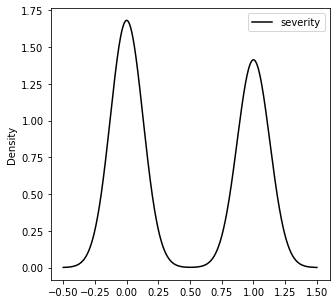

In [28]:
colors=["red", "blue", "green", "orange", "magenta", "black"]
for ix, c in zip(df_new.columns, colors):
    # definiamo un dataframe per ogni colonna di quello originale e plottiamo la densità dei valori 
    df_new[ix].plot(kind='density', subplots=True, sharey=True, legend=True, color=c, figsize=(5, 5))
    plt.show()

# Creazione dataset 

In [29]:
dset = df_new.values

In [30]:
dset

array([[ 4., 27.,  2.,  1.,  3.,  0.],
       [ 5., 55.,  4.,  3.,  3.,  1.],
       [ 5., 66.,  4.,  4.,  3.,  1.],
       ...,
       [ 4., 45.,  1.,  1.,  3.,  0.],
       [ 5., 59.,  4.,  4.,  2.,  1.],
       [ 3., 43.,  2.,  1.,  3.,  0.]])

Separiamo le features dalle etichette

In [31]:
X = dset[:,0:5] # features
y = dset[:,5].astype(int) #etichette

In [32]:
X.shape, y.shape

((865, 5), (865,))

# Preprocessing 

#### Normalizzazione features

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
# definiamo lo scaler e lo fittiamo sui dati
scaler = StandardScaler().fit(X)
# scaliamo i dati
X_r = scaler.transform(X)

#togliere commento se si vuole provate su dataset non scalato.
#X_r = X

#### Visualizzazione dataset scalato

In [35]:
cols = ["BI_RADS", "age", "shape", "margin", "density"]

In [36]:
# creiamo un dataframe a partire dal dataset scalato
X_resc = pd.DataFrame(X_r, columns=cols)
display(X_resc.head())

,BI_RADS,age,shape,margin,density
0,-0.513475,-1.978838,-0.571929,-1.156948,0.204663
1,1.150030,-0.031755,1.047445,0.146974,0.204663
2,1.150030,0.733171,1.047445,0.798935,0.204663
3,-0.513475,1.498096,-0.571929,0.146974,0.204663
4,1.150030,1.498096,0.237758,0.798935,0.204663


Visualizziamo le statistiche del dataset scalato

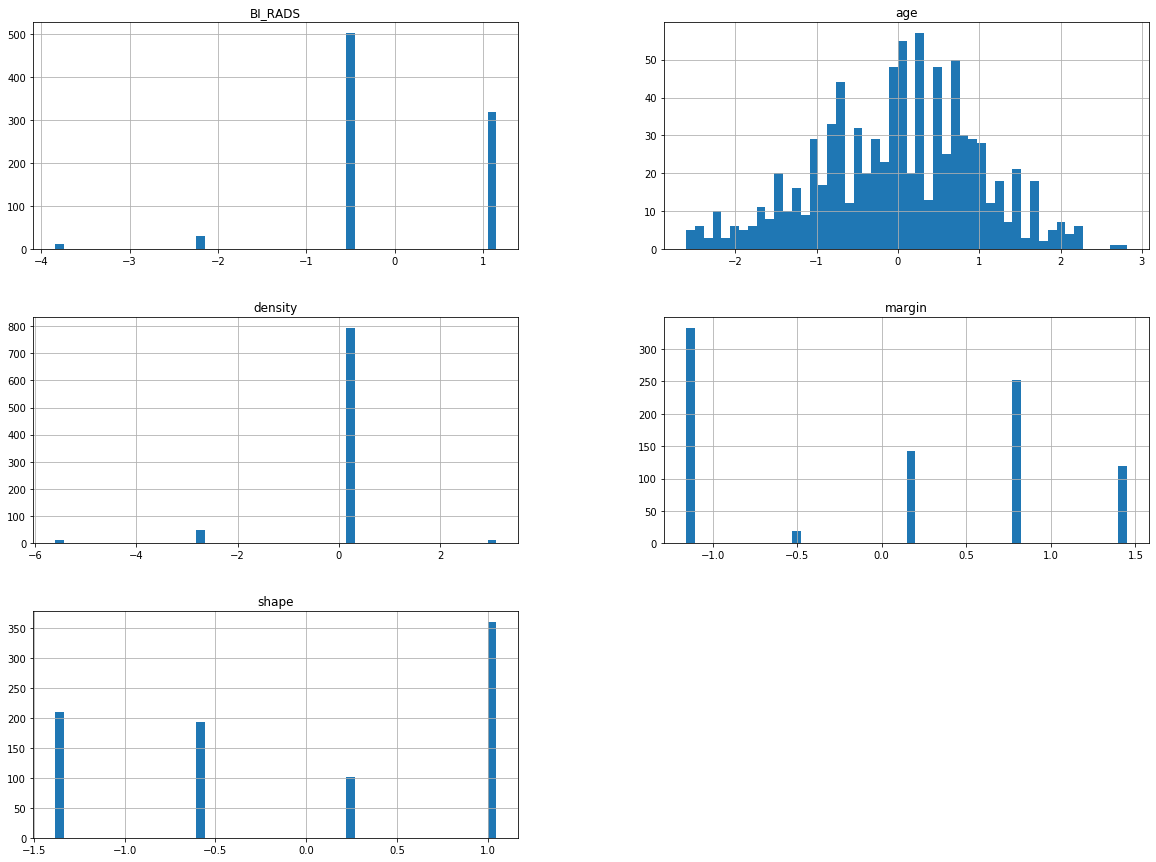

In [37]:
X_resc.hist(bins=50, figsize=(20, 15))
plt.show()

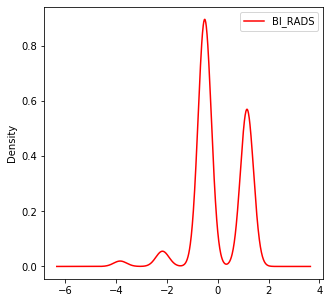

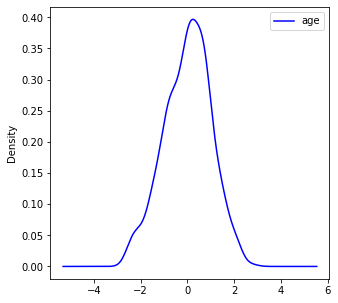

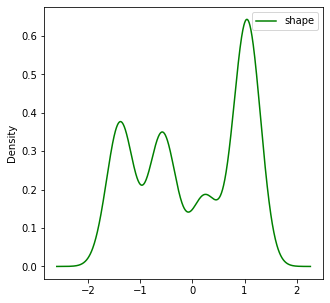

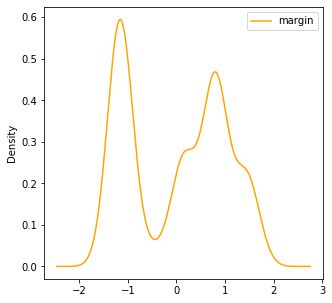

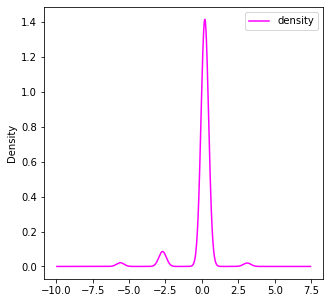

In [38]:
colors=["red", "blue", "green", "orange", "magenta"]
for ix, c in zip(X_resc.columns, colors):
    X_resc[ix].plot(kind='density', subplots=True, sharey=True, legend=True, color=c, figsize=(5, 5))
    plt.show()

#### Split dataset 

Lo split è così impostato: 70% utilizzato come training set e il restante 30% utilizzato come test set

In [39]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [40]:
# seed usato per la riproducibilità degli esperimenti
seed = 0
# numero fold da usare per la CV
folds = 10
# metrica per valutare le performance dei modelli durante al CV
metric = "accuracy"

In [41]:
#splittiamo il dataset in training set (70%) e test set (30%)
X_tr, X_ts, y_tr, y_ts = \
        train_test_split(X_r, y, test_size=.3, random_state=seed)

In [42]:
#visualizziamo la dimensione del dataset
X_tr.shape, y_tr.shape, X_ts.shape, y_ts.shape

((605, 5), (605,), (260, 5), (260,))

# Classificazione

## Valutazione algoritmi

Valutiamo i seguenti algoritmi:
1. Algoritmi lineari
    - Regressione logistica
    - Support Vector Machine Lineare
2. Algortmi non lineari
    - Support Vector Machine con Kernel
    - Alberi di Decisione
    - K-Nearest Neighbor
    - Multi-layer Perceptron
    
Tutti gli algoritmi sono addestrati sul dataset pulito e scalato con una ten fold cross validation

In [43]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [44]:
names = ["Logistic Regression", "Linear SVM", "Kernel SVM", "Decision Tree", "KNN", "MLP"]

Iper-parametri modelli

In [45]:
k = 3 #numero vicini per KNN
C = 0.025 #parametro di regolarizzazione per SVM. Più è piccolo, più regolarizza.
depth = 5 # Massima profondità albero di decisione
max_iter = 500 # Massimo numero di iterazioni per la convergenza MLP

In [46]:
# lista di modelli che proveremo
classifiers = [
    LogisticRegression(solver="liblinear", random_state=seed),
    SVC(kernel="linear", gamma="auto", C=0.025, random_state=seed),
    SVC(kernel="rbf",gamma="auto", random_state=seed),
    DecisionTreeClassifier(max_depth=depth, random_state=seed),
    KNeighborsClassifier(n_neighbors=k),
    MLPClassifier(alpha=1, max_iter=max_iter, random_state=seed)]

In [47]:
X_tr.shape, y_tr.shape

((605, 5), (605,))

In [48]:
folds

10

In [49]:
metric

'accuracy'

k-fold cross-validation consiste nella suddivisione del dataset totale in k parti di uguale numerosità e, ad ogni passo, la k-esima parte del dataset viene ad essere il validation dataset, mentre la restante parte costituisce il training dataset

In [50]:
results = []
#per ogni modello
for n, c in zip(names, classifiers):
    # definiamo il numero di partizioni del dataset
    kf = KFold(n_splits=folds, random_state=seed)
    # effettuiamo la CV 
    result = cross_val_score(c, X_tr, y_tr, cv=kf, scoring=metric)
    results.append(result)
    # Visualizzazione risultati
    print("Accuracy for {}: avg: {:.4f} std: {:.4f}".format(n, result.mean(), result.std()))

Accuracy for Logistic Regression: avg: 0.8627 std: 0.0608
Accuracy for Linear SVM: avg: 0.8464 std: 0.0492
Accuracy for Kernel SVM: avg: 0.8628 std: 0.0578
Accuracy for Decision Tree: avg: 0.8281 std: 0.0731
Accuracy for KNN: avg: 0.8198 std: 0.0523
Accuracy for MLP: avg: 0.8661 std: 0.0533


Visualizzazione grafica tramite box-plot delle performance degli algoritmi testati.

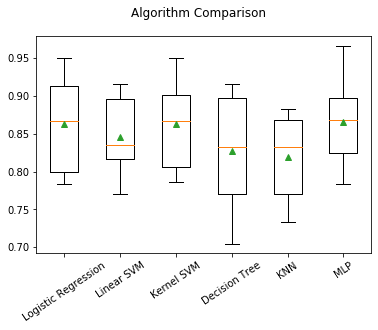

In [51]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results, showmeans=True)
ax.set_xticklabels(names)
plt.xticks(rotation=34)
plt.show()

## Miglioramento delle performance

Ci contentriamo sui tre modelli più performanti:
    1. SVM con Kernel
    2. MLP
    3. Regressione Logistica

### Tuning dei parametri tramite GridSearch

In [52]:
#dizionario per salvare i parametri migliori di ciascun modello
best_params = {}

#### SVM

Possiamo agire su:
1. Kernel: abbiamo visto che una SVM non lineare è migliore rispetto alla versione lineare, quindi proveremo diverse kernel non lineari.
2. C: fattore di regolarizzazione. Più è piccolo e più si regolarizza

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
# valori di C da provare per la SVM 
c_grid = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
# tipi di kernel da provare per la SVM
kernel_grid = ['poly', 'rbf', 'sigmoid']
# costruiamo la griglia di parametri
param_grid = dict(C=c_grid, kernel=kernel_grid)
# il modello su cui fare GridSearch
svm = SVC(gamma="auto", random_state=seed)
# definiamo il numero di partizioni del dataset
kf = KFold(n_splits=folds, random_state=seed)
# effettuiamo la GridSearch. In pratica testiamo la SVM con tutti i parametri specificati in c_grid e kernel_grid
grid = GridSearchCV(estimator=svm, param_grid=param_grid, scoring=metric, cv=kf)
# per ogni configurazione misuriamo le performance 
grid_result = grid.fit(X_tr, y_tr)
# visualizziamo qual è la migliore configurazione
print("Best: {} using {}".format(grid_result.best_score_, grid_result.best_params_))

Best: 0.8644628099173554 using {'C': 0.7, 'kernel': 'rbf'}


In [55]:
#salvataggio migliori parametri
best_params["SVM"] = grid_result.best_params_

#### MLP

Nel caso del MLP andiamo ad agire su:
1. Learning rate: stabilisce di quanto aggiornare i pesi in accordo al gradiente. Più è grande, meno passi sono necessari. Tuttavia se troppo grande SGD diverge; se troppo piccolo converge troppo lentamente. 
2. Taglia hidden layer

In [56]:
# per evitare i warning durante l'esecuzione
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [57]:
# valori del learning rate da provare per il MLP 
lr_grid = [0.001, 0.01] 
# dimensione e numero layer da provare per il MLP
hl_grid = [32, 64, 128] #3 (32) 1 layer da 32 neuroni ....
# costruiamo la griglia di parametri
param_grid = dict(learning_rate_init=lr_grid, hidden_layer_sizes=hl_grid)
# il modello su cui fare GridSearch
mlp = MLPClassifier(random_state=seed)
# definiamo il numero di partizioni del dataset
kf = KFold(n_splits=folds, random_state=seed)
# effettuiamo la GridSearch. In pratica testiamo il MLP con tutti i parametri specificati in lr_grid e hl_grid
grid = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring=metric, cv=kf)
# per ogni configurazione misuriamo le performance 
grid_result = grid.fit(X_tr, y_tr)
# visualizziamo qual è la migliore configurazione
print("Best: {} using {}".format(grid_result.best_score_, grid_result.best_params_))

Best: 0.8644628099173554 using {'hidden_layer_sizes': 32, 'learning_rate_init': 0.001}


In [58]:
#salvataggio migliori parametri
best_params["MLP"] = grid_result.best_params_

#### Logistic Regression

In questo caso andiamo ad agire sul fattore di regolarizzazione C, inversamente proporzionale all'entità della regolarizzazione

In [59]:
# costruiamo la griglia di parametri, in questo caso solo C
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
# il modello su cui fare GridSearch
log_reg = LogisticRegression(solver="liblinear", random_state=seed)
# definiamo il numero di partizioni del dataset
kf = KFold(n_splits=folds, random_state=seed)
# effettuiamo la GridSearch. In pratica testiamo il MLP con tutti i parametri specificati nella griglia
grid = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring=metric, cv=kf)
# per ogni configurazione misuriamo le performance 
grid_result = grid.fit(X_tr, y_tr)
# visualizziamo qual è la migliore configurazione
print("Best: {} using {}".format(grid_result.best_score_, grid_result.best_params_))

Best: 0.8644628099173554 using {'C': 10}


In [60]:
#salvataggio migliori parametri
best_params["Logistic Regression"] = grid_result.best_params_

### Confronto performance in seguito a tuning

Costruiamo i modelli con i parametri ottimali e confrontiamo le performance

In [61]:
for k,v in best_params.items():
    print(v)

{'C': 0.7, 'kernel': 'rbf'}
{'hidden_layer_sizes': 32, 'learning_rate_init': 0.001}
{'C': 10}


In [62]:
kernel = "rbf"
hl_s = 32
lr = 0.001

In [63]:
classifiers = [
    LogisticRegression(C=10, solver="liblinear", random_state=seed),
    SVC(C=0.7, kernel=kernel,gamma="auto", random_state=seed),
    MLPClassifier(hidden_layer_sizes=hl_s, learning_rate_init=lr, alpha=1, max_iter=max_iter, random_state=seed)]

In [64]:
names = ["SVM_K", "Logistic Regression", "MLP"]

In [65]:
opt_results = []
for n, c in zip(names, classifiers):
    # definiamo il numero di partizioni del dataset
    kf = KFold(n_splits=folds, random_state=seed)
    # effettuiamo la CV
    result = cross_val_score(c, X_tr, y_tr, cv=kf, scoring=metric)
    opt_results.append(result)
    # visualizziamo le performance dei modelli
    print("Accuracy for {}: avg: {:.4f} std: {:.4f}".format(n, result.mean(), result.std()))

Accuracy for SVM_K: avg: 0.8643 std: 0.0603
Accuracy for Logistic Regression: avg: 0.8644 std: 0.0563
Accuracy for MLP: avg: 0.8660 std: 0.0525


Il modello migliore è il MLP

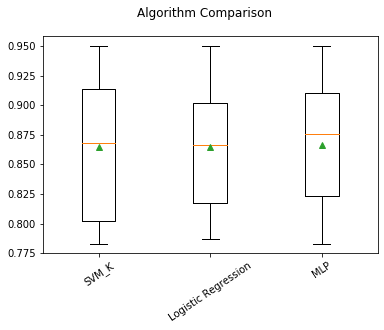

In [66]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(opt_results, showmeans=True)
ax.set_xticklabels(names)
plt.xticks(rotation=34)
plt.show()

## Si può fare di meglio?

### Ensemble Learning

Proviamo due algoritmi di apprendimento ensemble:
    1. AdaBoost
    2. RandomForest

In [67]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

In [68]:
names = ["AdaBoost", "Random Forest"]

In [69]:
models = [
    AdaBoostClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed)
]

In [70]:
results = []

In [71]:
for n,m in zip(names, models):
    # definiamo il numero di partizioni del dataset
    kf = KFold(n_splits=folds, random_state=seed)
    # otteniamo i risultati della CV
    result = cross_val_score(m, X_tr, y_tr, cv=kf, scoring=metric)
    # salviamo i risultati
    results.append(result)
    # e li visualizziamo 
    print("Accuracy for {}: avg: {:.4f} std: {:.4f}".format(n, result.mean(), result.std()))
    

Accuracy for AdaBoost: avg: 0.8447 std: 0.0593
Accuracy for Random Forest: avg: 0.8315 std: 0.0549


Confrontando le performance dei due modelli con quelle ottenute con MLP, notiamo che MLP performa meglio.

In [72]:
names.append("MLP")
results.append(opt_results[2])

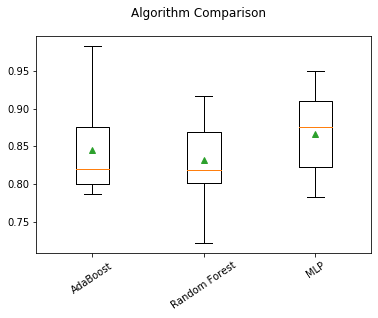

In [73]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results, showmeans=True)
ax.set_xticklabels(names)
plt.xticks(rotation=34)
plt.show()

## Possiamo migliorare?

### Tuning dei parametri tramite GridSearch

In questo caso agiamo sul numero di stimatori utilizzati dai modelli

In [74]:
gs_results = []

In [75]:
models = [
    AdaBoostClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed)
]

In [76]:
best_p = []

In [77]:
param_grid = {'n_estimators': [50, 100, 200, 500, 1000]}

kf = KFold(n_splits=folds, random_state=seed)
for m in models:
    grid = GridSearchCV(estimator=m, param_grid=param_grid, scoring=metric, cv=kf)
    grid_result = grid.fit(X_tr, y_tr)
    print("Best: {} using {}".format(grid_result.best_score_, grid_result.best_params_))
    best_p.append(grid_result.best_params_)

Best: 0.8462809917355372 using {'n_estimators': 100}
Best: 0.8347107438016529 using {'n_estimators': 1000}


In [78]:
best_p

[{'n_estimators': 100}, {'n_estimators': 1000}]

In [79]:
names = ["AdaBoost", "Random Forest"]

In [80]:
models = [
    AdaBoostClassifier(n_estimators = 100, random_state=seed),
    RandomForestClassifier(n_estimators = 1000, random_state=seed)
]

In [81]:
results = []

In [82]:
for n,m in zip(names, models):
    kf = KFold(n_splits=folds, random_state=seed)
    result = cross_val_score(m, X_tr, y_tr, cv=kf, scoring=metric)
    results.append(result)
    print("Accuracy for {}: avg: {:.4f} std: {:.4f}".format(n, result.mean(), result.std()))
    

Accuracy for AdaBoost: avg: 0.8463 std: 0.0529
Accuracy for Random Forest: avg: 0.8348 std: 0.0595


In [83]:
names.append("MLP")
results.append(opt_results[2])

Ancora una volta MLP è più performante. At least, we tried!

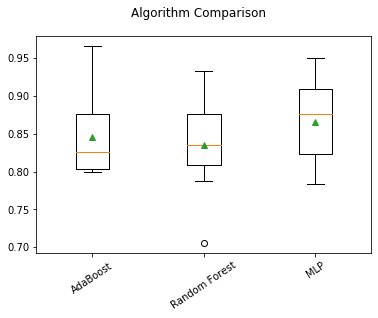

In [84]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results, showmeans=True)
ax.set_xticklabels(names)
plt.xticks(rotation=34)
plt.show()

# Put it all together!

Adesso che abbiamo il modello ottimale possiamo inserire tutto in una pipeline, che procederà a scalare il dataset, addestrare il modello e infine predire.

In [85]:
from sklearn.pipeline import Pipeline

##### Parametri ottimi

In [86]:
hl_s = 32
lr = 0.001

In [87]:
seed = 0

##### Dataset

In [88]:
X = dset[:,0:5] # features
y = dset[:,5].astype(int) #etichette

##### Split

In [89]:
X_tr, X_ts, y_tr, y_ts = \
        train_test_split(X_r, y, test_size=.3, random_state=seed)

In [90]:
# la pipeline eseguirà prima uno scaling dei dati passati e poi vi applicherà il modello
pipeline = Pipeline([('Scaler', StandardScaler()),('MLP', MLPClassifier(hidden_layer_sizes=hl_s, learning_rate_init=lr, random_state=seed))])

##### Fit modello su training set

In [91]:
#l'algoritmo legge il training set e crea il modello previsionale
fit = pipeline.fit(X_tr, y_tr)

##### Predizioni su test set

In [92]:
pred = pipeline.predict(X_ts)

In [93]:
# confronto etichette di test con quelle prodotte dal  modello
accuracy = float(pipeline.score(X_ts, y_ts)*100)

In [94]:
print("Accuracy on test set: {:.2f}%".format(accuracy))

Accuracy on test set: 83.08%


# Riduciamo il dataset per visualizzarlo in 2D

In [95]:
from sklearn.decomposition import PCA

In [96]:
# effettuiamo una PCA selezionando le due componenti più significative del training set
reduced_X_tr = PCA(n_components=2).fit_transform(X_tr)

In [97]:
# effettuiamo una PCA selezionando le due componenti più significative del test set
reduced_X_ts = PCA(n_components=2).fit_transform(X_ts)

### Fit del modello sul dataset ridotto e predizione

In [98]:
#estraiamo il modello dalla pipeline
mlp = pipeline[1]

In [99]:
# fittiamo il modello al training set (addestramento)
mlp.fit(reduced_X_tr, y_tr)
# e otteniamo le predizioni sul test set 
pred_ = mlp.predict(reduced_X_ts)

In [100]:
"Accuracy: "+str(round((1 - (np.count_nonzero(y_ts-pred) / y_ts.shape[0])), 4)*100)+"%"

'Accuracy: 83.08%'

In [101]:
"Misclassified examples: " + str(np.count_nonzero(y_ts-pred))

'Misclassified examples: 44'

### Visualizzazione decision boundary

In [102]:
from mlxtend.plotting import plot_decision_regions

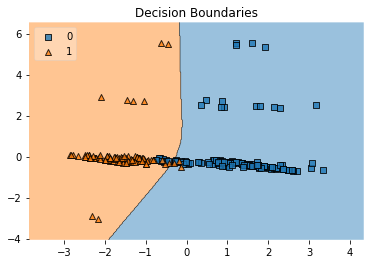

In [103]:
# funzione di librearia che prende dataset, predizioni data dal modello e modello 
plot_decision_regions(reduced_X_ts, pred, clf=mlp, legend=2)
plt.title('Decision Boundaries')
plt.show()

### Plot curva ROC

In [104]:
from sklearn.metrics import roc_curve, auc

In [105]:
# applichiamo la pipeline ai dati e otteniamo le predizioni
y_score = pipeline.fit(X_tr, y_tr).predict(X_ts)

In [106]:
# otteniamo false positive rate (fpr) e true positive rate (tpr)
# TPR = esempi positivi classificati come positivi
# FPR = esempi negativi classificati come pisitivi
fpr, tpr, _ = roc_curve(y_ts, y_score)
# sulla base di fpr e tpr calcoliamo l'area al di sotto della curva (Area Under the Curve AUC)
roc_auc = auc(fpr, tpr)

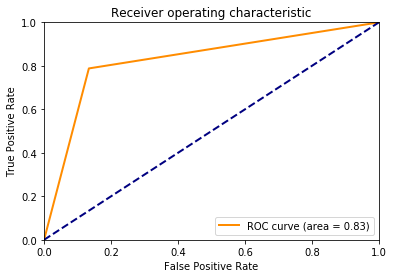

In [107]:
# visualizziamo la curva ROC
plt.figure()
lw = 2
# plottiamo la curva roc
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
# visualizziamo la diagonale
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# settiamo i valori 
# su x
plt.xlim([0.0, 1.0])
# su y
plt.ylim([0.0, 1.0])
# settiamo le etichette
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# e il titolo
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

---

# Clustering

In [108]:
from sklearn.cluster import KMeans

In [109]:
# tramite KMEANS dividiamo il dataset in due cluster significativi
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [110]:
# otteniamo le predizioni
kmeans.predict

<bound method KMeans.predict of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)>

### Riduciamo il dataset completo per visualizzarlo in 2D

In [111]:
reduced_X = PCA(n_components=2).fit_transform(X)

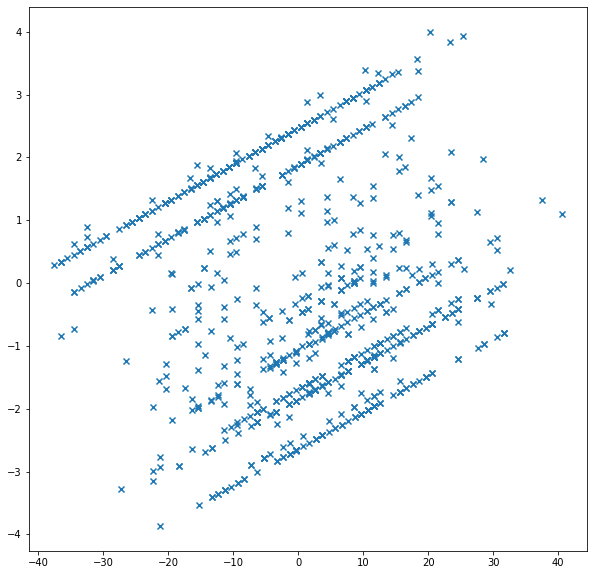

In [112]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes()
plt.scatter(reduced_X[:,0], reduced_X[:,1], marker = "x")
plt.show()

### Visualizzazione cluster ottenuti tramite KMeans

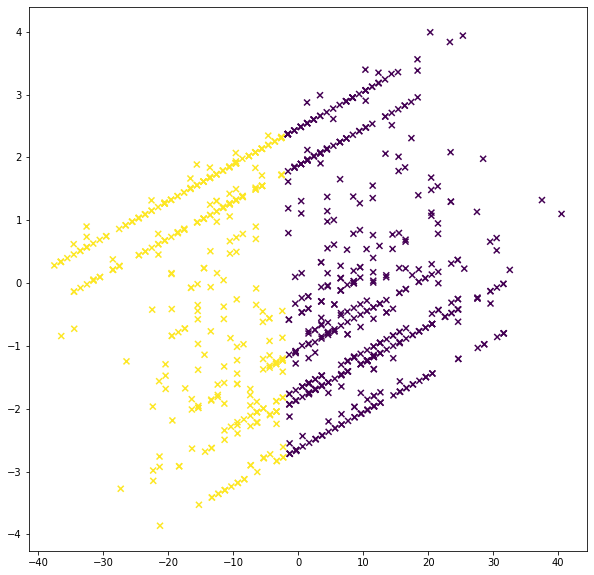

In [113]:
fig = plt.figure(figsize = (10, 10))
ax = plt.axes()
plt.scatter(reduced_X[:,0], reduced_X[:,1], marker = "x", c = kmeans.labels_)
plt.show()

# EXTRA

Silhouette si riferisce a un metodo di interpretazione e convalida della coerenza all'interno di cluster di dati. La tecnica fornisce una rappresentazione grafica sintetica di quanto bene ogni oggetto è stato classificato

For n_clusters = 2 The average silhouette_score is : 0.5484072139358389
For n_clusters = 3 The average silhouette_score is : 0.49228404757739586
For n_clusters = 4 The average silhouette_score is : 0.4855810538079753
For n_clusters = 5 The average silhouette_score is : 0.4904042349611599
For n_clusters = 6 The average silhouette_score is : 0.4783000153858147


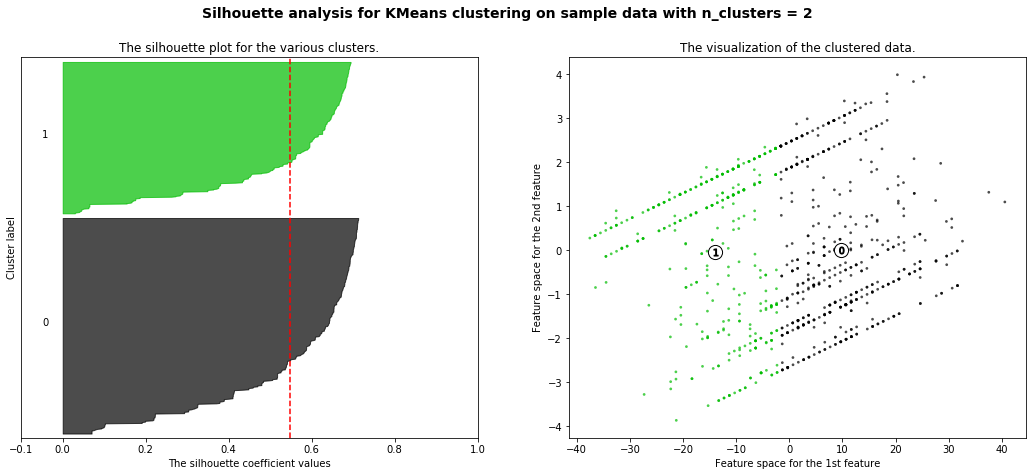

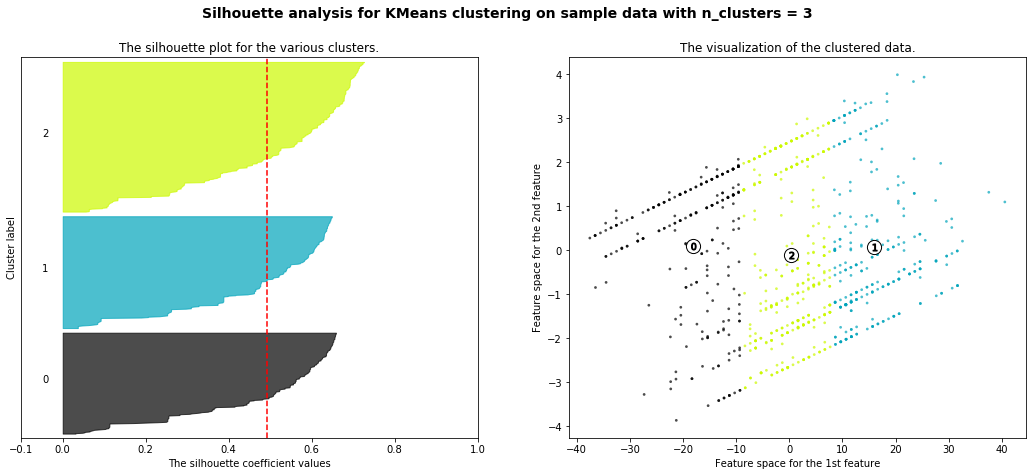

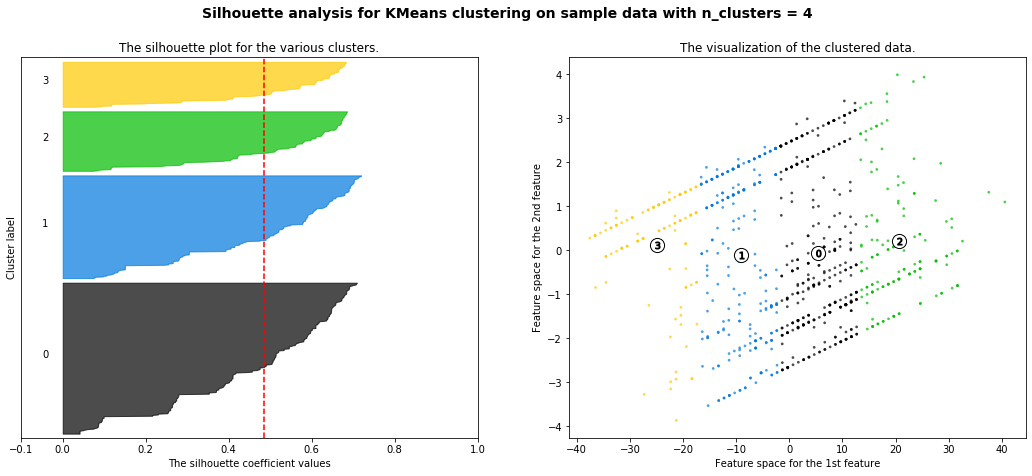

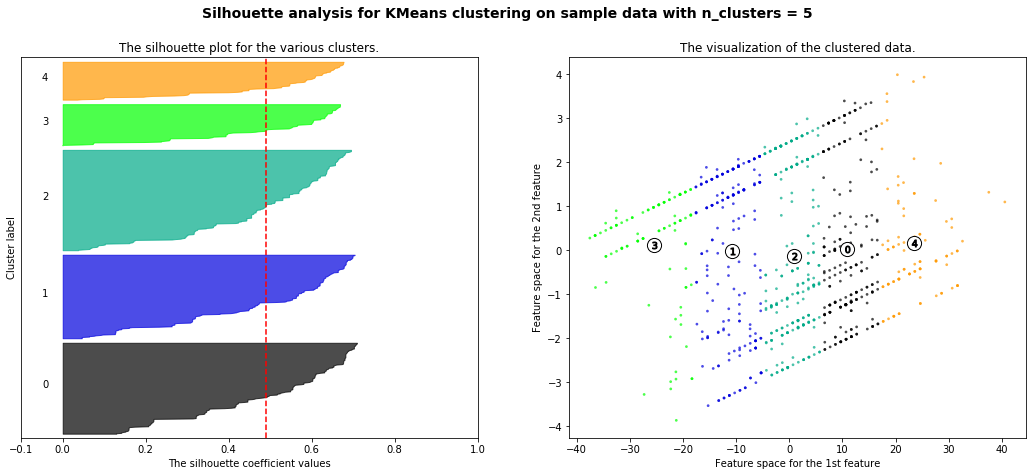

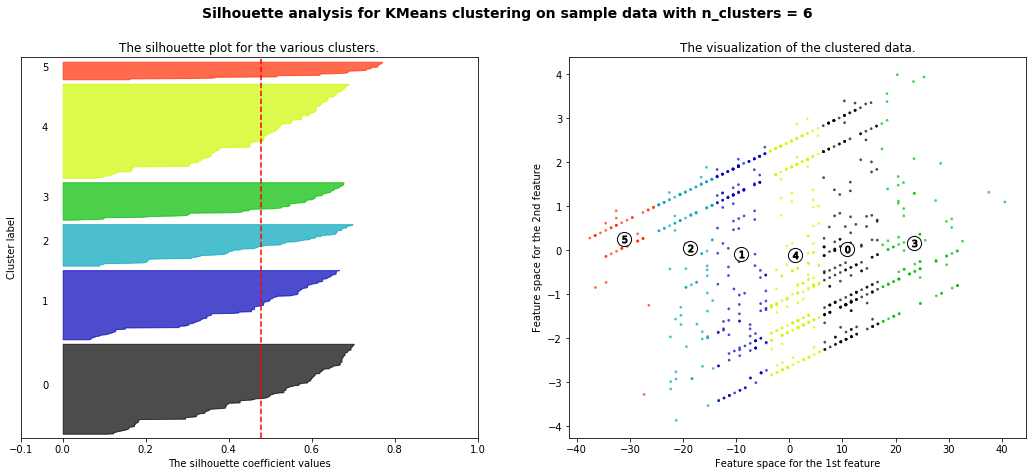

In [114]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
for n_clusters in range(2,7):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(reduced_X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=seed)
    cluster_labels = clusterer.fit_predict(reduced_X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(reduced_X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(reduced_X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(reduced_X[:, 0], reduced_X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
